# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report

# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [3]:
# Baca file CSV
data = pd.read_csv(r'D:\sertifikat\DBS DICODING\Belajar Machine Learning untuk Pemula\Submission\beverage-sales_clustered.csv')

# Tampilkan DataFrame untuk memastikan telah dibaca dengan benar
data.info()
print('\n')
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75948 entries, 0 to 75947
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order_ID       75948 non-null  object 
 1   Customer_ID    75948 non-null  object 
 2   Customer_Type  75948 non-null  object 
 3   Product        75948 non-null  object 
 4   Category       75948 non-null  object 
 5   Unit_Price     75948 non-null  float64
 6   Quantity       75948 non-null  float64
 7   Discount       75948 non-null  float64
 8   Total_Price    75948 non-null  float64
 9   Region         75948 non-null  object 
 10  Order_Date     75948 non-null  object 
 11  Cluster        75948 non-null  int64  
dtypes: float64(4), int64(1), object(7)
memory usage: 7.0+ MB




,Order_ID,Customer_ID,Customer_Type,Product,Category,Unit_Price,Quantity,Discount,Total_Price,Region,Order_Date,Cluster
0,ORD697566,CUS6363,B2C,Coca-Cola,Soft Drinks,1.04,7.0,0.00,7.28,Bremen,2021-02-17,0
1,ORD1118443,CUS7797,B2B,Selters,Water,0.71,46.0,0.10,29.39,Sachsen-Anhalt,2023-04-15,3
2,ORD1437128,CUS6393,B2B,Monster,Soft Drinks,2.68,30.0,0.05,76.38,Schleswig-Holstein,2021-09-07,3
3,ORD562794,CUS4090,B2C,San Pellegrino,Water,0.91,3.0,0.00,2.73,Hessen,2023-04-28,0
4,ORD2320519,CUS5936,B2C,Beck's,Alcoholic Beverages,1.41,4.0,0.00,5.64,Bremen,2023-11-01,0


# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [4]:
# Drop kolom yang kurang relevan
data = data.drop(columns=['Order_ID','Customer_ID','Order_Date'])

# Drop data duplikat
data = data.drop_duplicates(ignore_index=True)

# Cek data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43196 entries, 0 to 43195
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Customer_Type  43196 non-null  object 
 1   Product        43196 non-null  object 
 2   Category       43196 non-null  object 
 3   Unit_Price     43196 non-null  float64
 4   Quantity       43196 non-null  float64
 5   Discount       43196 non-null  float64
 6   Total_Price    43196 non-null  float64
 7   Region         43196 non-null  object 
 8   Cluster        43196 non-null  int64  
dtypes: float64(4), int64(1), object(4)
memory usage: 3.0+ MB


### Pisahkan fitur (X) dan target (y)

In [5]:
X = data.drop(columns=['Cluster'])
y = data['Cluster']

X.head()

,Customer_Type,Product,Category,Unit_Price,Quantity,Discount,Total_Price,Region
0,B2C,Coca-Cola,Soft Drinks,1.04,7.0,0.00,7.28,Bremen
1,B2B,Selters,Water,0.71,46.0,0.10,29.39,Sachsen-Anhalt
2,B2B,Monster,Soft Drinks,2.68,30.0,0.05,76.38,Schleswig-Holstein
3,B2C,San Pellegrino,Water,0.91,3.0,0.00,2.73,Hessen
4,B2C,Beck's,Alcoholic Beverages,1.41,4.0,0.00,5.64,Bremen


### Buat instance MinMaxScaler

In [6]:
scaler = MinMaxScaler()

# Normalisasi semua kolom numerik
numeric_columns = X.select_dtypes(include=['int64', 'float64']).columns
X[numeric_columns] = scaler.fit_transform(X[numeric_columns])

X.head()

,Customer_Type,Product,Category,Unit_Price,Quantity,Discount,Total_Price,Region
0,B2C,Coca-Cola,Soft Drinks,0.117647,0.089552,0.0,0.042820,Bremen
1,B2B,Selters,Water,0.063725,0.671642,1.0,0.178848,Sachsen-Anhalt
2,B2B,Monster,Soft Drinks,0.385621,0.432836,0.5,0.467946,Schleswig-Holstein
3,B2C,San Pellegrino,Water,0.096405,0.029851,0.0,0.014827,Hessen
4,B2C,Beck's,Alcoholic Beverages,0.178105,0.044776,0.0,0.032730,Bremen


### Buat instance LabelEncoder

In [7]:
encoder = LabelEncoder()

# Melakukan encoding pada kolom kategorikal
categorical_columns = X.select_dtypes(include=['object']).columns
for column in categorical_columns:
    X[column] = encoder.fit_transform(X[column])

X.head()

,Customer_Type,Product,Category,Unit_Price,Quantity,Discount,Total_Price,Region
0,1,5,2,0.117647,0.089552,0.0,0.042820,4
1,0,32,3,0.063725,0.671642,1.0,0.178848,13
2,0,20,2,0.385621,0.432836,0.5,0.467946,14
3,1,29,3,0.096405,0.029851,0.0,0.014827,6
4,1,2,0,0.178105,0.044776,0.0,0.032730,4


### Split data menjadi set pelatihan dan set uji

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=69)

# Tampilkan bentuk set pelatihan dan set uji untuk memastikan split
print(f"Training set shape: X_train={X_train.shape}, y_train={y_train.shape}")
print(f"Test set shape: X_test={X_test.shape}, y_test={y_test.shape}")

Training set shape: X_train=(34556, 8), y_train=(34556,)
Test set shape: X_test=(8640, 8), y_test=(8640,)


# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

In [9]:
nb = GaussianNB().fit(X_train, y_train)
rf = RandomForestClassifier(random_state=69).fit(X_train, y_train)

print("Model training selesai.")

Model training selesai.


# Penjelasan Algoritma

Dalam analisis ini, saya menggunakan dua algoritma utama, yaitu **Random Forest** dan **Naive Bayes**, untuk melakukan klasifikasi. Masing-masing algoritma memiliki prinsip kerja dan keunggulan tersendiri yang mendukung tugas klasifikasi dalam konteks dataset yang digunakan.

---

## **Random Forest**

**Random Forest** adalah algoritma ensemble yang menggabungkan kekuatan banyak pohon keputusan (*decision trees*) untuk meningkatkan akurasi prediksi dan mengurangi risiko overfitting yang sering terjadi pada model pohon keputusan tunggal. Berikut adalah penjelasan detail mengenai algoritma ini:

- **Prinsip Kerja:**
  - **Pembentukan Pohon Secara Acak:** Algoritma ini membangun sejumlah besar pohon keputusan menggunakan teknik *bootstrapping*, di mana setiap pohon dilatih pada subset acak dari data pelatihan.
  - **Pemilihan Fitur Secara Acak:** Pada setiap node pohon, pemilihan fitur yang digunakan untuk melakukan pemisahan dilakukan secara acak. Hal ini memastikan bahwa setiap pohon memiliki keragaman dalam pemodelannya.
  - **Voting atau Rata-rata Prediksi:** Untuk klasifikasi, setiap pohon memberikan prediksi (suara) dan hasil akhir ditentukan berdasarkan mayoritas suara. Sedangkan untuk regresi, hasil akhir dihitung sebagai rata-rata dari semua prediksi.
  
- **Keunggulan:**
  - **Akurasi Tinggi:** Dengan menggabungkan banyak pohon, model cenderung lebih stabil dan akurat.
  - **Mengurangi Overfitting:** Keberagaman pohon yang dihasilkan dari pemilihan data dan fitur acak membantu mencegah model menjadi terlalu fit terhadap data pelatihan.
  - **Kemampuan Menghadapi Data dengan Banyak Fitur:** Random Forest dapat bekerja efektif meskipun terdapat banyak fitur dan interaksi kompleks di antara fitur-fitur tersebut.
  
- **Aplikasi:**
  - Sering digunakan pada berbagai kasus klasifikasi maupun regresi, terutama ketika jumlah data cukup besar dan terdapat banyak variabel yang saling berinteraksi.

---

## **Naive Bayes**

**Naive Bayes** adalah algoritma klasifikasi berbasis probabilitas yang menggunakan teorema Bayes dengan asumsi independensi antar fitur. Walaupun asumsi ini sering kali dianggap "naif" karena fitur dalam data nyata biasanya saling bergantung, algoritma ini tetap memberikan performa yang cukup baik terutama pada dataset yang besar dan dengan fitur yang relatif sederhana.

- **Prinsip Kerja:**
  - **Teorema Bayes:** Algoritma ini menghitung probabilitas posterior untuk masing-masing kelas berdasarkan nilai-nilai fitur yang ada. Probabilitas dihitung dengan menggunakan informasi probabilitas sebelumnya (prior) dan likelihood dari data fitur.
  - **Asumsi Independen:** Dengan mengasumsikan bahwa semua fitur saling independen, perhitungan probabilitas untuk setiap fitur dapat dilakukan secara terpisah dan kemudian dikombinasikan (dikalikan) untuk menghasilkan probabilitas keseluruhan dari suatu kelas.
  - **Pemilihan Kelas:** Setelah menghitung probabilitas untuk setiap kelas, model memilih kelas dengan probabilitas tertinggi sebagai hasil prediksi.
  
- **Keunggulan:**
  - **Komputasi yang Efisien:** Proses perhitungan yang sederhana dan terdistribusi membuat Naive Bayes sangat cepat, terutama untuk dataset berukuran besar.
  - **Cocok untuk Teks dan Klasifikasi Dokumen:** Algoritma ini sering digunakan dalam aplikasi seperti filtering spam, analisis sentimen, dan pengelompokan dokumen karena kemampuannya dalam menangani data dengan dimensi tinggi.
  - **Kinerja yang Stabil:** Walaupun asumsi independensi tidak selalu terpenuhi, Naive Bayes sering memberikan hasil yang memuaskan dalam banyak aplikasi nyata.
  
- **Aplikasi:**
  - Ideal untuk kasus klasifikasi teks, analisis dokumen, dan situasi di mana kecepatan komputasi menjadi faktor penting.

---

## **Kesimpulan**

Dengan menggunakan **Random Forest** dan **Naive Bayes**, pendekatan ensemble dan berbasis probabilitas dapat saling melengkapi. Random Forest memberikan keunggulan dalam hal akurasi dan ketahanan terhadap overfitting dengan menggabungkan berbagai model pohon keputusan, sedangkan Naive Bayes menawarkan kecepatan dan efisiensi dalam komputasi, terutama pada dataset besar dengan fitur sederhana. Kombinasi kedua algoritma ini dapat memberikan gambaran yang lebih komprehensif dan robust terhadap proses klasifikasi yang diterapkan.


## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

Random Forest Classification Report:
               precision    recall  f1-score   support

           0    1.00000   1.00000   1.00000      4774
           1    0.99749   0.99498   0.99623      1196
           2    0.99703   0.99926   0.99814      1345
           3    0.99472   0.99472   0.99472      1325

    accuracy                        0.99838      8640
   macro avg    0.99731   0.99724   0.99727      8640
weighted avg    0.99838   0.99838   0.99838      8640



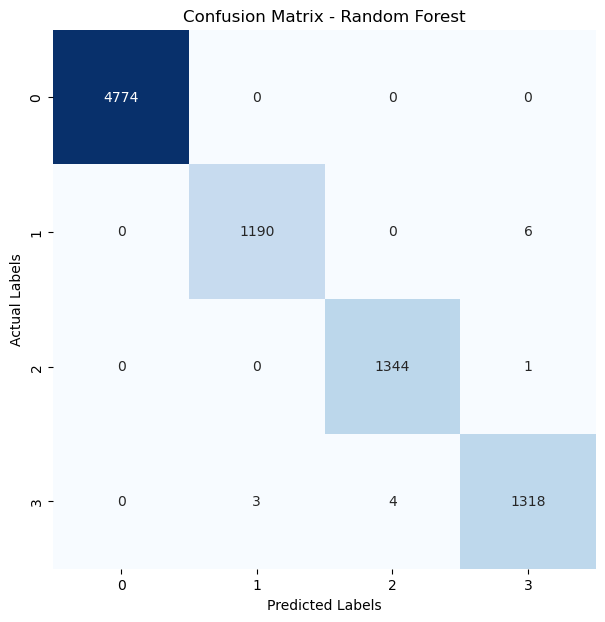

In [10]:
unique_labels = sorted(set(y))

# -----------------------------
# Random Forest
# -----------------------------

rf_y_pred = rf.predict(X_test)
print("Random Forest Classification Report:\n", classification_report(y_test, rf_y_pred, digits=5))

rf_cm = confusion_matrix(y_test, rf_y_pred)
plt.figure(figsize=(7, 7))
sns.heatmap(rf_cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=unique_labels,
            yticklabels=unique_labels)

plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix - Random Forest')
plt.show()
print('\n')

Naive Bayes Classification Report:
               precision    recall  f1-score   support

           0    1.00000   1.00000   1.00000      4774
           1    0.98003   0.98495   0.98249      1196
           2    0.95723   0.96506   0.96113      1345
           3    0.95031   0.93811   0.94417      1325

    accuracy                        0.98299      8640
   macro avg    0.97189   0.97203   0.97195      8640
weighted avg    0.98296   0.98299   0.98296      8640



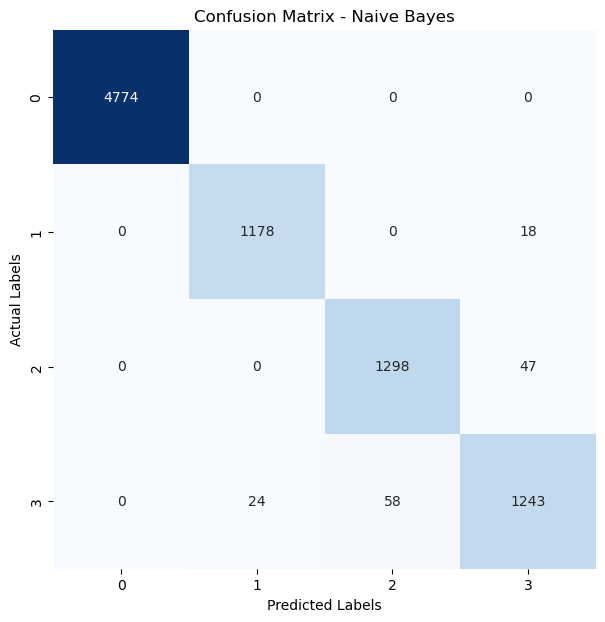

In [11]:
# -----------------------------
# Naive Bayes
# -----------------------------

nb_y_pred = nb.predict(X_test)
print("Naive Bayes Classification Report:\n", classification_report(y_test, nb_y_pred, digits=5))

nb_cm = confusion_matrix(y_test, nb_y_pred)
plt.figure(figsize=(7, 7))
sns.heatmap(nb_cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=unique_labels,
            yticklabels=unique_labels)

plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix - Naive Bayes')
plt.show()

Tulis hasil evaluasi algoritma yang digunakan, jika Anda menggunakan 2 algoritma, maka bandingkan hasilnya.

In [12]:
# Calculate classification reports for both models
rf_report = classification_report(y_test, rf_y_pred, digits=5, output_dict=True)
nb_report = classification_report(y_test, nb_y_pred, digits=5, output_dict=True)

# Extract relevant metrics (accuracy, precision, recall, F1 score)
metrics = {
    'Model': ['Random Forest', 'Naive Bayes'],
    'Accuracy': [rf_report['accuracy'], nb_report['accuracy']],
    'Precision': [rf_report['weighted avg']['precision'], nb_report['weighted avg']['precision']],
    'Recall': [rf_report['weighted avg']['recall'], nb_report['weighted avg']['recall']],
    'F1-Score': [rf_report['weighted avg']['f1-score'], nb_report['weighted avg']['f1-score']]
}

# Create a DataFrame
df = pd.DataFrame(metrics)

df

,Model,Accuracy,Precision,Recall,F1-Score
0,Random Forest,0.998380,0.998380,0.998380,0.998379
1,Naive Bayes,0.982986,0.982957,0.982986,0.982962


## **Kesimpulan Evaluasi Model**

Berdasarkan hasil evaluasi menggunakan **Random Forest** dan **Naive Bayes**, dapat disimpulkan bahwa:

1. **Random Forest**:
   - Mencapai **akurasi** sebesar **99,84%** (0.99838) pada data uji.
   - Hasil **precision**, **recall**, dan **F1-Score** (berdasarkan *weighted average*) juga tinggi, yaitu sekitar **0,998**.
   - Confusion matrix menunjukkan prediksi yang hampir sempurna untuk setiap kelas, dengan jumlah kesalahan prediksi yang sangat sedikit.

2. **Naive Bayes**:
   - Mencapai **akurasi** sebesar **98,30%** (0.98299) pada data uji.
   - Nilai **precision**, **recall**, dan **F1-Score** (berdasarkan *weighted average*) berada di kisaran **0,983**, yang masih tergolong tinggi namun sedikit lebih rendah dibandingkan Random Forest.
   - Confusion matrix memperlihatkan performa yang baik, meskipun masih terdapat sedikit kesalahan prediksi, terutama di kelas 2 dan 3.

Secara umum, **Random Forest** menunjukkan kinerja yang lebih unggul dari **Naive Bayes** dalam hal akurasi dan metrik evaluasi lainnya. Hal ini wajar mengingat Random Forest adalah metode *ensemble* yang menggabungkan banyak pohon keputusan dan cenderung lebih tahan terhadap *overfitting*. Sementara itu, **Naive Bayes** tetap memberikan hasil yang baik dan cenderung lebih efisien secara komputasi, sehingga masih layak dipertimbangkan jika kebutuhan utama adalah kecepatan pemrosesan dan model yang relatif sederhana.

Dengan demikian, pemilihan model dapat disesuaikan kembali dengan kebutuhan spesifik dan sumber daya yang tersedia. Apabila akurasi tinggi menjadi prioritas utama dan data relatif besar, **Random Forest** bisa menjadi pilihan unggul. Namun, jika dibutuhkan model yang cepat dan mudah diimplementasikan, **Naive Bayes** tetap menjadi alternatif yang solid.


## **c. Tuning Model Klasifikasi (Optional)**

Gunakan GridSearchCV, RandomizedSearchCV, atau metode lainnya untuk mencari kombinasi hyperparameter terbaik

In [13]:
# --------------------------------------------
# 1. Random Forest Model Hyperparameter Tuning
# --------------------------------------------

# Define Random Forest hyperparameters
rf_param_dist = {
    'n_estimators': np.arange(50, 500, 50),  # Number of trees in the forest
    'max_depth': np.arange(5, 50, 5),         # Maximum depth of each tree
    'min_samples_split': np.arange(2, 20, 2), # Minimum samples required to split a node
    'min_samples_leaf': np.arange(1, 20, 2),  # Minimum samples required to be at a leaf node
    'max_features': [None, 'sqrt', 'log2'], # The number of features to consider at each split
    'bootstrap': [True, False]                # Whether bootstrap samples are used when building trees
}

# Perform RandomizedSearchCV for RandomForest
rf_random_search = RandomizedSearchCV(  estimator=RandomForestClassifier(random_state=69),  # Model to tune
                                        param_distributions=rf_param_dist,  # Hyperparameter search space
                                        n_iter=100,  # Number of random combinations to test
                                        cv=3,  # 3-fold cross-validation for model evaluation
                                        verbose=2,  # Show detailed progress during the search
                                        random_state=69,  # Set seed for reproducibility
                                        n_jobs=-1  # Use all CPU cores for parallel processing
)

# Fit the model on the training data
rf_random_search.fit(X_train, y_train)

# ------------------------------------------
# 2. Naive Bayes Model Hyperparameter Tuning
# ------------------------------------------

# Define Naive Bayes hyperparameters
nb_param_dist = {
    'var_smoothing': np.logspace(0, -9, num=100)  # Smoothing parameter
}

# Perform RandomizedSearchCV for Naive Bayes
nb_random_search = RandomizedSearchCV(estimator=GaussianNB(),
                                      param_distributions=nb_param_dist,
                                      n_iter=100,
                                      cv=3,
                                      verbose=2,
                                      random_state=69,
                                      n_jobs=-1)

# Fit the model on the training data
nb_random_search.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=GaussianNB(), n_iter=100, n_jobs=-1,
                   param_distributions={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5.33669923e-02, 4.32876128e-0...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])},
                   random_state=69, verbose=2)

## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

Berikut adalah rekomendasi tahapannya.
1. Gunakan model dengan hyperparameter terbaik.
2. Hitung ulang metrik evaluasi untuk melihat apakah ada peningkatan performa.

In [14]:
# -----------------------------
# 1. Random Forest
# -----------------------------

# Print the best parameters and score
print("Best Random Forest Hyperparameters:", rf_random_search.best_params_)
print("Best Random Forest Accuracy:", rf_random_search.best_score_)

# Predict and evaluate the Random Forest model
rf_best_model = rf_random_search.best_estimator_
rf_best_model_y_pred = rf_best_model.predict(X_test)
print("Random Forest (best model) Classification Report:\n", classification_report(y_test, rf_best_model_y_pred, digits=5))

# -----------------------------
# 2. Naive Bayes
# -----------------------------

# Print the best parameters and score
print("Best Naive Bayes Hyperparameters:", nb_random_search.best_params_)
print("Best Naive Bayes Accuracy:", nb_random_search.best_score_)

# Predict and evaluate the Naive Bayes model
nb_best_model = nb_random_search.best_estimator_
nb_best_model_y_pred = nb_best_model.predict(X_test)
print("Naive Bayes (best model) Classification Report:\n", classification_report(y_test, nb_best_model_y_pred, digits=5))

Best Random Forest Hyperparameters: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 45, 'bootstrap': False}
Best Random Forest Accuracy: 0.9992765324476579
Random Forest (best model) Classification Report:
               precision    recall  f1-score   support

           0    1.00000   1.00000   1.00000      4774
           1    1.00000   0.99833   0.99916      1196
           2    0.99777   1.00000   0.99889      1345
           3    0.99849   0.99774   0.99811      1325

    accuracy                        0.99942      8640
   macro avg    0.99907   0.99902   0.99904      8640
weighted avg    0.99942   0.99942   0.99942      8640

Best Naive Bayes Hyperparameters: {'var_smoothing': 2.310129700083158e-08}
Best Naive Bayes Accuracy: 0.9850676709228395
Naive Bayes (best model) Classification Report:
               precision    recall  f1-score   support

           0    1.00000   1.00000   1.00000      4774
           1    0.980

In [15]:
# Calculate classification reports for both models
rf_best_report = classification_report(y_test, rf_best_model_y_pred, digits=5, output_dict=True)
nb_best_report = classification_report(y_test, nb_best_model_y_pred, digits=5, output_dict=True)

# Extract relevant metrics (accuracy, precision, recall, F1 score)
metrics_tuned = {
    'Model': ['Random Forest (Tuned)', 'Naive Bayes (Tuned)'],
    'Accuracy': [rf_best_report['accuracy'], nb_best_report['accuracy']],
    'Precision': [rf_best_report['weighted avg']['precision'], nb_best_report['weighted avg']['precision']],
    'Recall': [rf_best_report['weighted avg']['recall'], nb_best_report['weighted avg']['recall']],
    'F1-Score': [rf_best_report['weighted avg']['f1-score'], nb_best_report['weighted avg']['f1-score']]
}

# Create a DataFrame
df_tuned = pd.DataFrame(metrics_tuned)

df_tuned

,Model,Accuracy,Precision,Recall,F1-Score
0,Random Forest (Tuned),0.999421,0.999422,0.999421,0.999421
1,Naive Bayes (Tuned),0.982986,0.982957,0.982986,0.982962


## **e. Analisis Hasil Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Bandingkan hasil evaluasi sebelum dan setelah tuning (jika dilakukan).
2. Identifikasi kelemahan model, seperti:
  - Precision atau Recall rendah untuk kelas tertentu.
  - Apakah model mengalami overfitting atau underfitting?
3. Berikan rekomendasi tindakan lanjutan, seperti mengumpulkan data tambahan atau mencoba algoritma lain jika hasil belum memuaskan.

In [16]:
df_merged = pd.concat([df, df_tuned], ignore_index=True)
df_merged.iloc[[1, 2]] = df_merged.iloc[[2, 1]].values
df_merged

,Model,Accuracy,Precision,Recall,F1-Score
0,Random Forest,0.998380,0.998380,0.998380,0.998379
1,Random Forest (Tuned),0.999421,0.999422,0.999421,0.999421
2,Naive Bayes,0.982986,0.982957,0.982986,0.982962
3,Naive Bayes (Tuned),0.982986,0.982957,0.982986,0.982962


## Analisis Hasil Evaluasi Model Klasifikasi**

Berikut adalah rangkuman analisis hasil evaluasi model beserta rekomendasi tindak lanjut:

1. **Perbandingan Hasil Evaluasi Sebelum dan Sesudah Tuning**  
   - **Random Forest** mengalami peningkatan kinerja setelah proses tuning. Akurasinya naik dari **0.998380** menjadi **0.999421**, demikian pula dengan metrik **Precision**, **Recall**, dan **F1-Score**.  
   - **Naive Bayes** tidak mengalami perubahan kinerja yang berarti, baik sebelum maupun sesudah tuning, dengan akurasi di sekitar **0.982986** dan metrik lain yang relatif sama.

2. **Identifikasi Kelemahan Model**  
   - **Precision atau Recall Rendah:**  
     - Tidak ada indikasi yang menonjol akan rendahnya precision atau recall untuk kelas tertentu. Meskipun begitu, performa Naive Bayes sedikit lebih rendah dibandingkan Random Forest, khususnya saat menangani kelas-kelas tertentu yang lebih kompleks.  
   - **Overfitting atau Underfitting:**  
     - **Overfitting:** Tidak ditemukan bukti yang jelas, terutama pada Random Forest yang telah dituning. Model menunjukkan performa yang konsisten antara data pelatihan dan data uji.  
     - **Underfitting:** Juga tidak terindikasi pada hasil evaluasi, mengingat metrik keseluruhan berada pada kisaran yang tinggi.

3. **Rekomendasi Tindakan Lanjutan**  
   - **Pengumpulan Data Tambahan:** Meski performa sudah tinggi, menambah data atau melakukan *data augmentation* (jika relevan) dapat semakin memantapkan generalisasi model, khususnya untuk kelas yang lebih jarang atau kompleks.  
   - **Mencoba Algoritma Lain atau Metode Ensemble Tambahan:** Jika dibutuhkan peningkatan performa lebih lanjut atau aspek interpretabilitas yang lebih baik, pertimbangkan untuk menggabungkan model lain, seperti Gradient Boosting, XGBoost, atau metode stacking.  
   - **Analisis Fitur Lebih Lanjut:** Pastikan fitur-fitur yang digunakan benar-benar relevan dan eksplorasi teknik *feature engineering* agar model dapat menangkap pola yang lebih dalam.  

Secara keseluruhan, **Random Forest (Tuned)** memberikan performa terbaik, diikuti oleh **Random Forest (Non-Tuned)**, sedangkan **Naive Bayes** menempati posisi berikutnya dengan akurasi yang masih tergolong baik. Pemilihan model pada akhirnya dapat disesuaikan kembali dengan kebutuhan spesifik, seperti fokus pada interpretabilitas, kecepatan komputasi, atau keterbatasan sumber daya.
